In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# SPDX-License-Identifier: CC-BY-4.0
#
# Code for "Bayesian continual learning and forgetting in neural networks"
# Djohan Bonnet, Kellian Cottart, Tifenn Hirtzlin, Tarcisius Januel, Thomas Dalgaty, Elisa Vianello, Damien Querlioz
# arXiv: 2504.13569
# Portions of the code are adapted from the Pytorch project (BSD-3-Clause)
#
# Author: Kellian Cottart <kellian.cottart@gmail.com>
# Date: 2025-07-03

## Loading data

In [2]:

import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import os
import seaborn as sns
import re
import json
import pandas as pd
AXESSIZE = 28
FONTSIZE = 26
TICKSIZE = 24   
LEGENDSIZE = 26
plt.rcParams['svg.fonttype'] = 'none'
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.5"
FOLDER = "output-figures"
os.makedirs(FOLDER, exist_ok=True)
results_folder = "RESULTS-N-STUDY"
df = pd.DataFrame()
# iterate through all root folders in the results folder
for folder in os.listdir(results_folder):
    current_path = os.path.join(results_folder, folder)
    # extract the name from the first config
    config_path = os.path.join(current_path, "config0/config.json")
    with open(config_path, "r") as f:
        config = json.load(f)
    # n_iterations is the number of config folders
    n_iterations = len([f for f in os.listdir(current_path) if f.startswith("config") and os.path.isdir(os.path.join(current_path, f))])
    
    # Add the row of parameters to the dataframe   
    row = {
        "path": current_path,
        "opt": config["optimizer"],
        "layers": int(config["network_params"]["layers"][:-1][1:][0]),
        "n_tasks": config["n_tasks"],
        "n_epochs": config["epochs"],
        "n_train_samples": config["n_train_samples"],
        "n_test_samples": config["n_test_samples"],
        "N": int(config["optimizer_params"]["N"]),
        "n_iterations": n_iterations,
    }
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
# One color for each path
colors = sns.color_palette("viridis", len(df["path"].unique()))
markers = ["D", "o", "s", "h", "^", "x", "v", "p", "*", "X", "D", "o", "s", "h", "^", "x", "v", "p", "*", "X"]

FileNotFoundError: [Errno 2] No such file or directory: 'RESULTS-N-STUDY'

In [ ]:
df

,path,opt,layers,n_tasks,n_epochs,n_train_samples,n_test_samples,N,n_iterations
0,RESULTS-N-STUDY/20250616-041732-permutedmnist-...,mesu,50,200,1,10,10,300000,5
1,RESULTS-N-STUDY/20250616-075711-permutedmnist-...,mesu,50,200,1,10,10,600000,5
2,RESULTS-N-STUDY/20250616-113654-permutedmnist-...,mesu,50,200,1,10,10,1200000,5
3,RESULTS-N-STUDY/20250616-151631-permutedmnist-...,mesu,50,200,1,10,10,2400000,5
4,RESULTS-N-STUDY/20250616-185352-permutedmnist-...,mesu,256,200,1,10,10,300000,5
5,RESULTS-N-STUDY/20250616-232645-permutedmnist-...,mesu,256,200,1,10,10,600000,5
6,RESULTS-N-STUDY/20250617-050836-permutedmnist-...,mesu,256,200,1,10,10,1200000,5
7,RESULTS-N-STUDY/20250617-094146-permutedmnist-...,mesu,256,200,1,10,10,2400000,5
8,RESULTS-N-STUDY/20250617-141425-permutedmnist-...,mesu,512,200,1,10,10,300000,5
9,RESULTS-N-STUDY/20250617-201146-permutedmnist-...,mesu,512,200,1,10,10,600000,5


In [ ]:
data = []
for idx, row in df.iterrows():
    path = row["path"]
    n_tasks = row["n_tasks"]
    n_epochs = row["n_epochs"]
    n_iterations = row["n_iterations"]
    full_accuracies = []
    full_epistemic_auc = []
    full_aleatoric_auc = []
    full_weights_l1 = []
    full_weights_l3 = []
    for it in range(n_iterations):
        current_it_path = os.path.join(path, f"config{it}")
        accuracy_path = os.path.join(current_it_path, "accuracy")
        uncertainty_path = os.path.join(current_it_path, "uncertainty")
        weights_path = os.path.join(current_it_path, "weights")
        accuracies = []
        epistemic_auc = []
        aleatoric_auc = []
        for task in range(n_tasks):
            for epoch in range(n_epochs):
                suffix = f"task={task}-epoch={epoch}.npy"
                accuracies.append(jnp.load(os.path.join(accuracy_path, suffix)))
                epistemic_auc.append(jnp.load(os.path.join(uncertainty_path, f"roc-auc-epistemic-{suffix}")))
                aleatoric_auc.append(jnp.load(os.path.join(uncertainty_path, f"roc-auc-aleatoric-{suffix}")))
        if not os.path.exists(os.path.join(weights_path, f"layer=1-{suffix}")) or not os.path.exists(os.path.join(weights_path, f"layer=3-{suffix}")):
            print(f"Missing weights for {current_it_path}, skipping...")
            layer_1 = jnp.zeros(1)
            layer_3 = jnp.zeros(1)
        else:
            layer_1 = jnp.load(os.path.join(weights_path, f"layer=1-{suffix}")).flatten()
            layer_3 = jnp.load(os.path.join(weights_path, f"layer=3-{suffix}")).flatten()
        full_accuracies.append(jnp.array(accuracies))
        full_epistemic_auc.append(jnp.array(epistemic_auc))
        full_aleatoric_auc.append(jnp.array(aleatoric_auc))
        full_weights_l1.append(jnp.array(layer_1))
        full_weights_l3.append(jnp.array(layer_3))
    full_accuracies = jnp.array(full_accuracies)
    full_epistemic_auc = jnp.array(full_epistemic_auc)
    full_aleatoric_auc = jnp.array(full_aleatoric_auc)
    full_weights_l1 = jnp.array(full_weights_l1)
    full_weights_l3 = jnp.array(full_weights_l3)
    accuracy_array = jnp.mean(full_accuracies, 0)[-1]
    epistemic_auc_array = jnp.mean(full_epistemic_auc, 0)
    aleatoric_auc_array = jnp.mean(full_aleatoric_auc, 0)
    first_accuracy = jnp.mean(full_accuracies, 0)[0]
    accuracy_std = jnp.std(full_accuracies, 0)[-1]
    data.append((accuracy_array, epistemic_auc_array, aleatoric_auc_array, first_accuracy, accuracy_std, full_weights_l1, full_weights_l3))

# Add new columns to df
df["accuracies"] = [d[0] for d in data]
df["epistemic_auc"] = [d[1] for d in data]
df["aleatoric_auc"] = [d[2] for d in data]
df["first_accuracies"] = [d[3] for d in data]
df["accuracy_std"] = [d[4] for d in data]
df["weights_l1"] = [d[5] for d in data]
df["weights_l3"] = [d[6] for d in data]
df = df.sort_values(by=["N", "layers"])

## Weight distribution

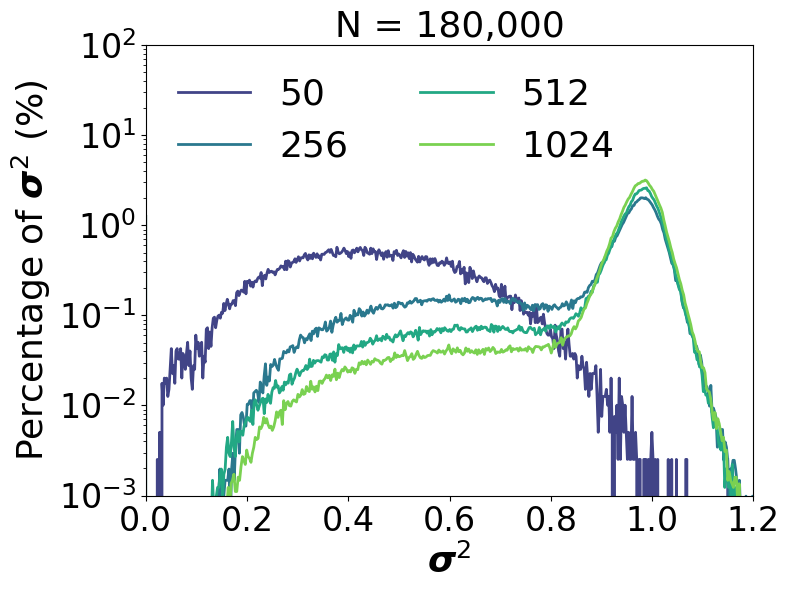

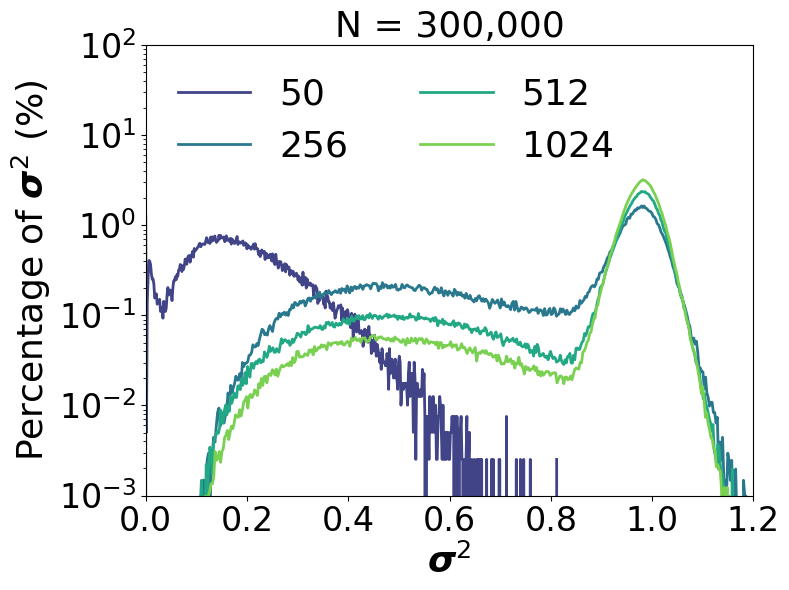

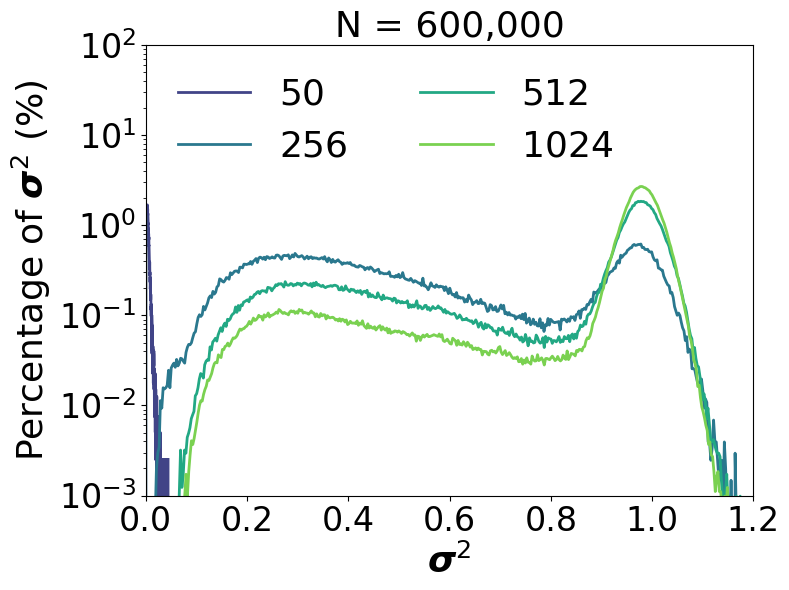

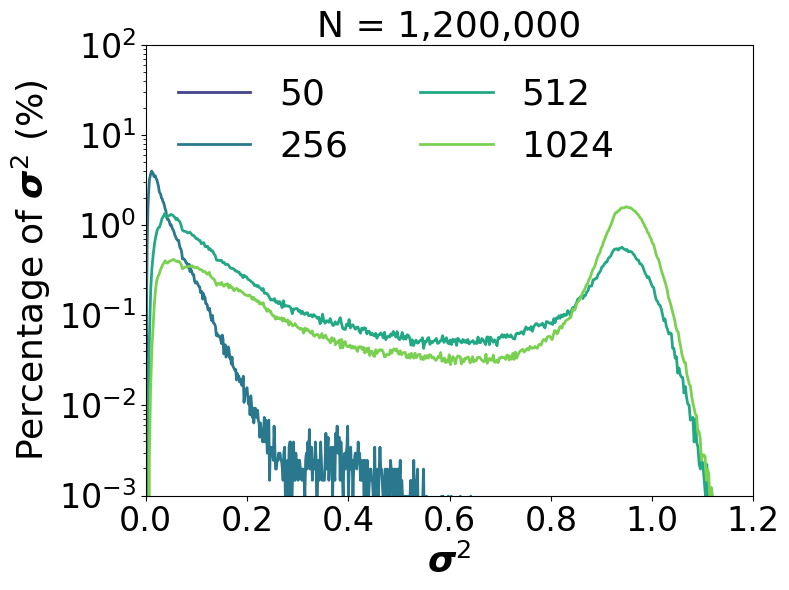

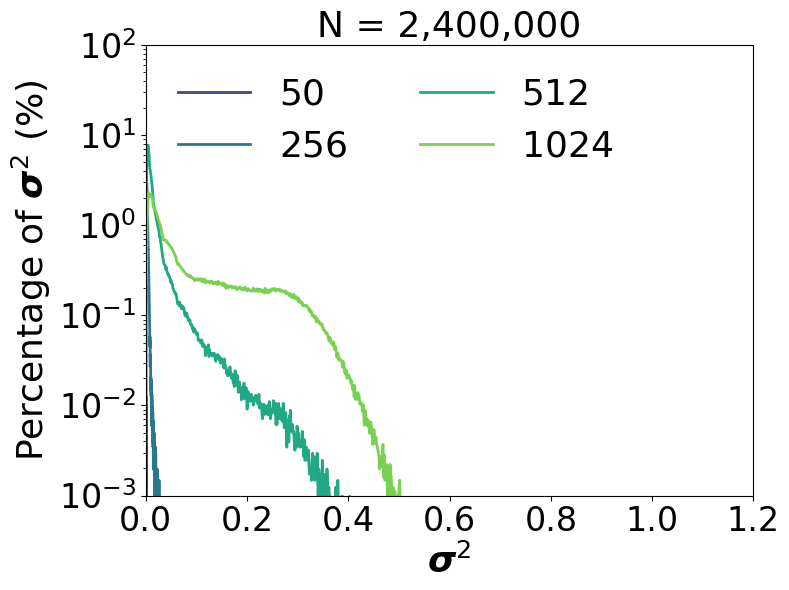

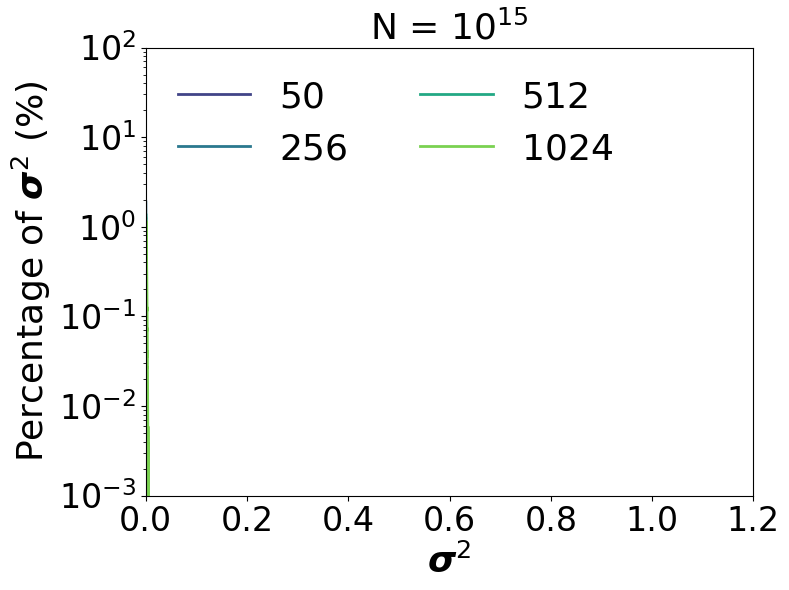

In [ ]:
# Collect mean accuracies, epistemic AUC, and memory rigidity resilience
colors = sns.color_palette("viridis", len(df["layers"].unique()))
for N_studied in df["N"].unique():
    rows = []
    df_N = df[df["N"] == N_studied]
    for idx, row in df_N.iterrows():
        rows.append({
            "N": int(row["N"]),
            "layers": str(row["layers"]),
            "sigma_1": row["weights_l1"][0],
            "sigma_2": row["weights_l3"][0]
        })
    result_df = pd.DataFrame(rows)
    bins = 500
    fig, ax = plt.subplots(figsize=(8, 6))
    for idx, row in result_df.iterrows():
        # histogram of the weights
        full_sigma = jnp.concatenate([row['sigma_1'], row['sigma_2']]) ** 2
        hist, bin_edges = jnp.histogram(full_sigma, bins=bins, density=True)
        # Normalize so area sums to 1, then convert to percentage
        bin_width = bin_edges[1] - bin_edges[0]
        hist_percent = hist * bin_width * 100
        ax.plot(bin_edges[:-1], hist_percent, label=row['layers'], color=colors[idx % len(colors)], linewidth=2)
    # semilogy
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 100)
    ax.set_xlim(0, 1.2)
    ax.set_xlabel(r"$\boldsymbol{\sigma}^2$", fontsize=FONTSIZE)
    ax.set_ylabel(r"Percentage of $\boldsymbol{\sigma}^2$ (%)", fontsize=FONTSIZE)
    ax.tick_params(axis='both', which='major', labelsize=TICKSIZE)
    N_name = re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N_studied)) if len(str(N_studied)) < 10 else r"$10^{{{}}}$".format(len(str(N_studied)) - 1)
    ax.set_title(f"N = {N_name}", fontsize=FONTSIZE)
    ax.legend(fontsize=LEGENDSIZE, title_fontsize=FONTSIZE, frameon=False, loc='upper left', ncol=2)
    plt.tight_layout()
    #save figure
    fig.savefig(os.path.join(FOLDER, f"pmnist-N-study-histogram-N={N_studied}.svg"), format="svg", bbox_inches='tight')
    fig.savefig(os.path.join(FOLDER, f"pmnist-N-study-histogram-N={N_studied}.pdf"), format="pdf", bbox_inches='tight')

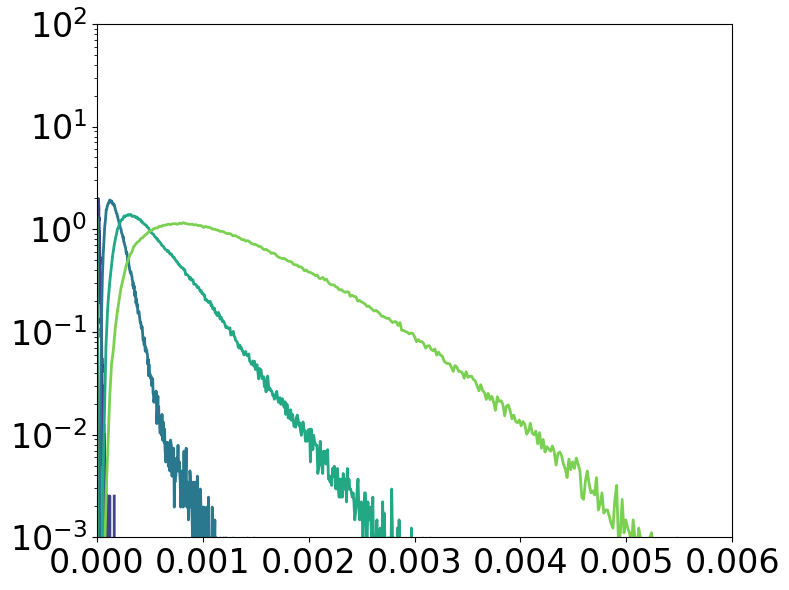

In [21]:
# Collect mean accuracies, epistemic AUC, and memory rigidity resilience
colors = sns.color_palette("viridis", len(df["layers"].unique()))
N_studied = df["N"].unique()[-1]
rows = []
df_N = df[df["N"] == N_studied]
for idx, row in df_N.iterrows():
    rows.append({
        "N": int(row["N"]),
        "layers": str(row["layers"]),
        "sigma_1": row["weights_l1"][0],
        "sigma_2": row["weights_l3"][0]
    })
result_df = pd.DataFrame(rows)
bins = 500
fig, ax = plt.subplots(figsize=(8, 6))
for idx, row in result_df.iterrows():
    # histogram of the weights
    full_sigma = jnp.concatenate([row['sigma_1'], row['sigma_2']]) ** 2
    hist, bin_edges = jnp.histogram(full_sigma, bins=bins, density=True)
    # Normalize so area sums to 1, then convert to percentage
    bin_width = bin_edges[1] - bin_edges[0]
    hist_percent = hist * bin_width * 100
    ax.plot(bin_edges[:-1], hist_percent, label=row['layers'], color=colors[idx % len(colors)], linewidth=2)
# semilogy
ax.set_yscale('log')
ax.set_ylim(1e-3, 100)
ax.set_xlim(0, 0.006)
ax.tick_params(axis='both', which='major', labelsize=TICKSIZE)
plt.tight_layout()
#save figure
fig.savefig(os.path.join(FOLDER, f"pmnist-N-study-histogram-N={N_studied}-zoom.svg"), format="svg", bbox_inches='tight')
fig.savefig(os.path.join(FOLDER, f"pmnist-N-study-histogram-N={N_studied}-zoom.pdf"), format="pdf", bbox_inches='tight')

## Time window 5

In [ ]:
# Collect mean accuracies, epistemic AUC, and memory rigidity resilience
time_windows = [5]
rows = []
for window in time_windows:
    for N in df["N"].unique():
        df_N = df[df["N"] == N]
        for idx, row in df_N.iterrows():
            mean_acc = row["accuracies"][-window:].mean() * 100
            mean_epistemic_auc = row["epistemic_auc"][-window:].mean()
            memory_rigidity_resilience = 1 / jnp.abs((row["accuracies"][-1] - row["first_accuracies"][0]))
            rows.append({
                "N": int(N),
                "layers": str(row["layers"]),
                "window": int(window),
                "mean_accuracy": float(mean_acc),
                "mean_epistemic_auc": float(mean_epistemic_auc),
                "memory_rigidity_resilience": float(memory_rigidity_resilience),
            })
result_df = pd.DataFrame(rows)
result_df


,N,layers,window,mean_accuracy,mean_epistemic_auc,memory_rigidity_resilience
0,180000,50,5,86.856979,0.972425,573.795837
1,180000,256,5,82.014832,0.954047,180.218018
2,180000,512,5,79.288864,0.902843,114.496017
3,180000,1024,5,74.695122,0.859981,104.653526
4,300000,50,5,91.337746,0.940820,328.424072
5,300000,256,5,88.707939,0.952092,163.137421
6,300000,512,5,89.493591,0.935894,104.435287
7,300000,1024,5,87.743599,0.901288,102.085968
8,600000,50,5,89.467957,0.896544,40.258038
9,600000,256,5,93.062096,0.945546,215.172516


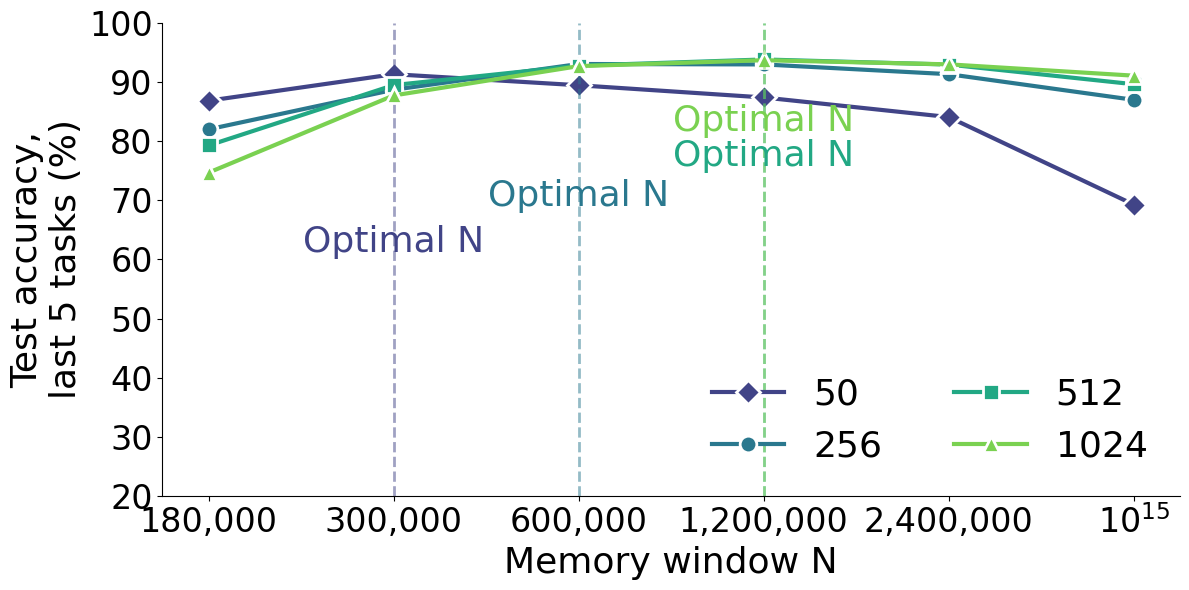

In [ ]:
plt.figure(figsize=(12, 6))
markers = ["D", "o", "s", "^"]
colors = sns.color_palette("viridis", len(result_df["layers"].unique()))
for i, neurons in enumerate(result_df["layers"].unique()):
    df_N = result_df[result_df["layers"] == neurons]
    N_names = df_N["N"].astype(str).unique()
    N_names = [re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N)) if len(str(N)) < 10 else r"$10^{{{}}}$".format(len(str(N)) - 1) for N in N_names]
    plt.plot(N_names, df_N["mean_accuracy"], marker=markers[i], markersize=12, linewidth=3, label=f"{neurons}", color=colors[i], markeredgewidth=2, markeredgecolor="white")
    # trace a vertical line at max accuracy
    
    new_df_N = df_N.sort_values(by="mean_accuracy", ascending=False)
    max_accuracy_N = new_df_N["N"].iloc[0]
    max_accuracy_N = str(re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(max_accuracy_N))) if len(str(max_accuracy_N)) < 10 else r"$10^{{{}}}$".format(len(str(max_accuracy_N)) - 1)
    # write text "optimal N" at the top of the line
    plt.text(max_accuracy_N, new_df_N["mean_accuracy"].max() - 30 + 6*i, "Optimal N", ha='center', fontsize=FONTSIZE, color=colors[i])
    plt.axvline(x=max_accuracy_N, color=colors[i], linestyle="--", linewidth=2, alpha=0.5)
    
plt.ylim(20, 100)
plt.xlabel("Memory window N", fontsize=FONTSIZE)
plt.ylabel(f"Test accuracy,\nlast 5 tasks (%)", fontsize=FONTSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)


plt.legend(fontsize=LEGENDSIZE, loc="lower right", ncol=2, frameon=False)
# remove top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-short-term-accuracy.svg"))
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-short-term-accuracy.pdf"), bbox_inches='tight')
plt.show()


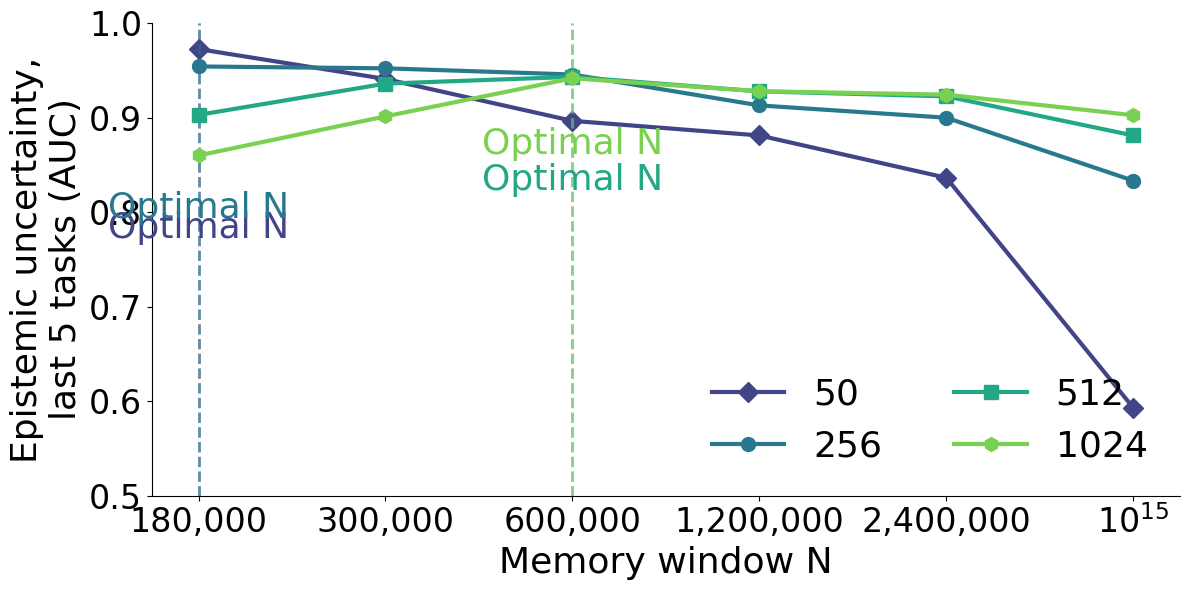

In [ ]:
plt.figure(figsize=(12, 6))
markers = ["D", "o", "s", "h", "^", "x", "v", "p", "*", "X"]
colors = sns.color_palette("viridis", len(result_df["layers"].unique()))
for i, neurons in enumerate(result_df["layers"].unique()):
    df_N = result_df[result_df["layers"] == neurons]
    N_names = df_N["N"].astype(str).unique()
    N_names = [re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N)) if len(str(N)) < 10 else r"$10^{{{}}}$".format(len(str(N)) - 1) for N in N_names]
    plt.plot(N_names, df_N["mean_epistemic_auc"], marker=markers[i], markersize=10, linewidth=3, label=f"{neurons}", color=colors[i])
    max_df_N = df_N.sort_values(by="mean_epistemic_auc", ascending=False)
    max_accuracy_N = max_df_N["N"].iloc[0]
    max_accuracy_N = str(re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(max_accuracy_N))) if len(str(max_accuracy_N)) < 10 else r"$10^{{{}}}$".format(len(str(max_accuracy_N)) - 1)
    # write text "optimal N" at the top of the line
    plt.text(max_accuracy_N, max_df_N["mean_epistemic_auc"].max() - 0.2 + 0.04 * i, "Optimal N", ha='center', fontsize=FONTSIZE, color=colors[i])
    plt.axvline(x=max_accuracy_N, color=colors[i], linestyle="--", linewidth=2, alpha=0.5)
plt.ylim(0.5, 1)
plt.xlabel("Memory window N", fontsize=FONTSIZE)
plt.ylabel(f"Epistemic uncertainty,\nlast 5 tasks (AUC)", fontsize=FONTSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.legend(fontsize=LEGENDSIZE, loc="lower right", ncol=2, frameon=False)
# remove top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-short-term-epistemic-auc.svg"))
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-short-term-epistemic-auc.pdf"), bbox_inches='tight')
plt.show()

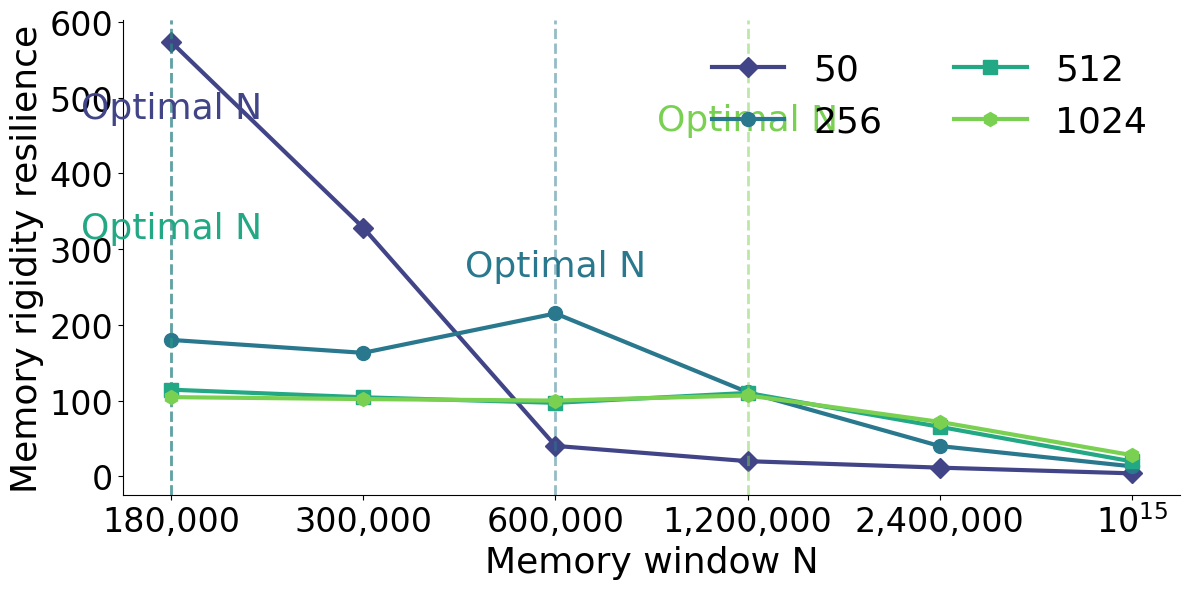

In [ ]:
plt.figure(figsize=(12, 6))
markers = ["D", "o", "s", "h", "^", "x", "v", "p", "*", "X"]
colors = sns.color_palette("viridis", len(result_df["layers"].unique()))
for i, neurons in enumerate(result_df["layers"].unique()):
    df_N = result_df[result_df["layers"] == neurons]
    N_names = df_N["N"].astype(str).unique()
    N_names = [re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N)) if len(str(N)) < 10 else r"$10^{{{}}}$".format(len(str(N)) - 1) for N in N_names]
    plt.plot(N_names, df_N["memory_rigidity_resilience"], marker=markers[i], markersize=10, linewidth=3, label=f"{neurons}", color=colors[i])
    
    new_df_N = df_N.sort_values(by="memory_rigidity_resilience", ascending=False)
    max_accuracy_N = new_df_N["N"].iloc[0]
    max_accuracy_N = str(re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(max_accuracy_N))) if len(str(max_accuracy_N)) < 10 else r"$10^{{{}}}$".format(len(str(max_accuracy_N)) - 1)
    # write text "optimal N" at the top of the line
    plt.text(max_accuracy_N, new_df_N["memory_rigidity_resilience"].max() - 100 + 150 * i, "Optimal N", ha='center', fontsize=FONTSIZE, color=colors[i])
    plt.axvline(x=max_accuracy_N, color=colors[i], linestyle="--", linewidth=2, alpha=0.5)
    
    
plt.xlabel("Memory window N", fontsize=FONTSIZE)
plt.ylabel(f"Memory rigidity resilience", fontsize=FONTSIZE) 
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.legend(fontsize=LEGENDSIZE, loc="upper right", ncol=2, frameon=False)
# remove top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-memory-rigidity-resilience.svg"))
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-memory-rigidity-resilience.pdf"), bbox_inches='tight')
plt.show()

In [ ]:
# Collect mean accuracies, epistemic AUC, and memory rigidity resilience
time_windows = [20]
rows = []
for window in time_windows:
    for N in df["N"].unique():
        df_N = df[df["N"] == N]
        for idx, row in df_N.iterrows():
            mean_acc = row["accuracies"][-window:].mean() * 100
            mean_epistemic_auc = row["epistemic_auc"][-window:].mean()            
            rows.append({
                "N": int(N),
                "layers": str(row["layers"]),
                "window": int(window),
                "mean_accuracy": float(mean_acc),
                "mean_epistemic_auc": float(mean_epistemic_auc),
            })
result_df = pd.DataFrame(rows)
result_df


,N,layers,window,mean_accuracy,mean_epistemic_auc
0,180000,50,20,37.750500,0.967956
1,180000,256,20,32.738979,0.947970
2,180000,512,20,30.833235,0.904535
3,180000,1024,20,28.640730,0.860699
4,300000,50,20,57.259621,0.955210
5,300000,256,20,42.632214,0.955973
6,300000,512,20,42.233273,0.938628
7,300000,1024,20,39.665367,0.893069
8,600000,50,20,66.028351,0.910962
9,600000,256,20,61.637012,0.946428


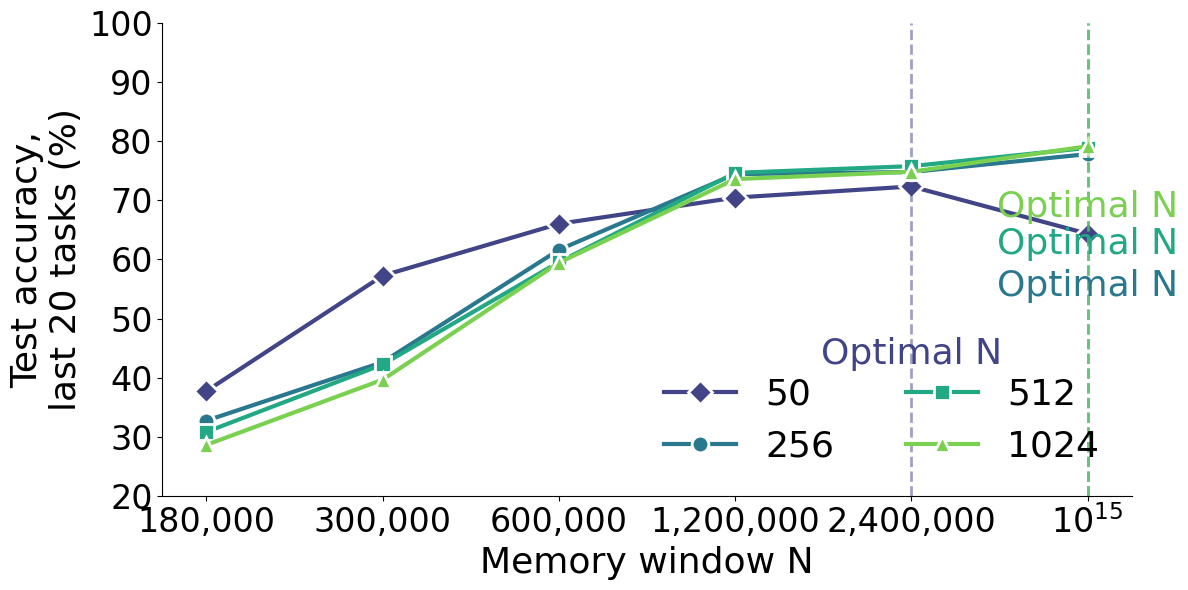

In [ ]:
plt.figure(figsize=(12, 6))
markers = ["D", "o", "s", "^"]
colors = sns.color_palette("viridis", len(result_df["layers"].unique()))
for i, neurons in enumerate(result_df["layers"].unique()):
    df_N = result_df[result_df["layers"] == neurons]
    N_names = df_N["N"].astype(str).unique()
    N_names = [re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N)) if len(str(N)) < 10 else r"$10^{{{}}}$".format(len(str(N)) - 1) for N in N_names]
    plt.plot(N_names, df_N["mean_accuracy"], marker=markers[i], markersize=12, linewidth=3, label=f"{neurons}", color=colors[i], markeredgewidth=2, markeredgecolor="white")
    # trace a vertical line at max accuracy
    
    new_df_N = df_N.sort_values(by="mean_accuracy", ascending=False)
    max_accuracy_N = new_df_N["N"].iloc[0]
    max_accuracy_N = str(re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(max_accuracy_N))) if len(str(max_accuracy_N)) < 10 else r"$10^{{{}}}$".format(len(str(max_accuracy_N)) - 1)
    # write text "optimal N" at the top of the line
    plt.text(max_accuracy_N, new_df_N["mean_accuracy"].max() - 30 + 6*i, "Optimal N", ha='center', fontsize=FONTSIZE, color=colors[i])
    plt.axvline(x=max_accuracy_N, color=colors[i], linestyle="--", linewidth=2, alpha=0.5)
    
plt.ylim(20, 100)
plt.xlabel("Memory window N", fontsize=FONTSIZE)
plt.ylabel(f"Test accuracy,\nlast 20 tasks (%)", fontsize=FONTSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)


plt.legend(fontsize=LEGENDSIZE, loc="lower right", ncol=2, frameon=False)
# remove top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-long-term-accuracy.svg"))
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-long-term-accuracy.pdf"), bbox_inches='tight')
plt.show()


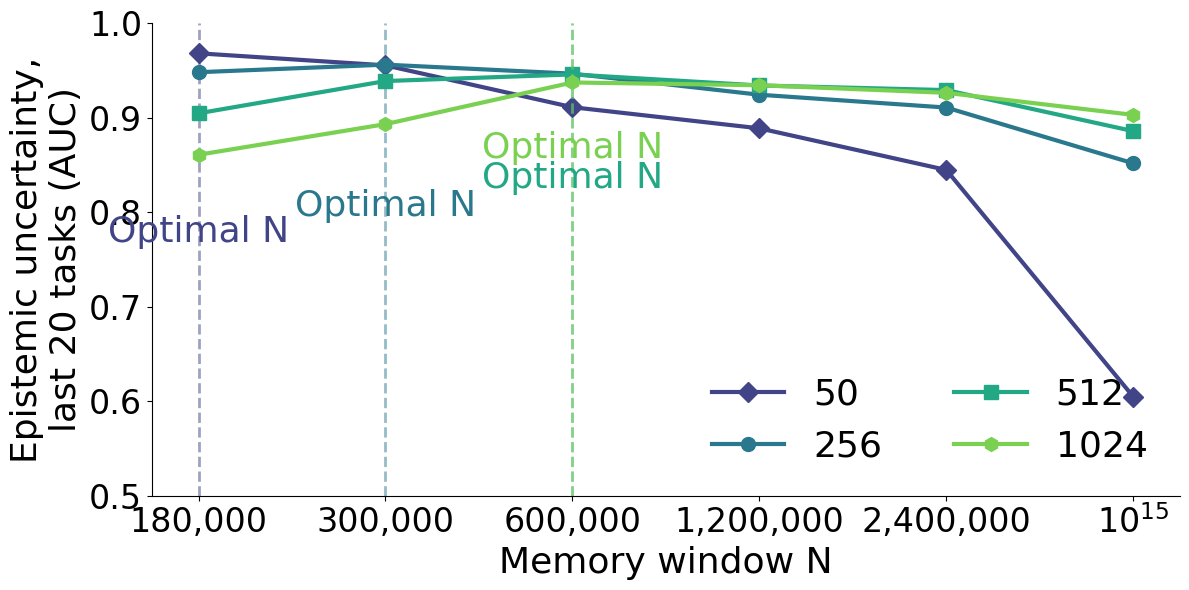

In [ ]:
plt.figure(figsize=(12, 6))
markers = ["D", "o", "s", "h", "^", "x", "v", "p", "*", "X"]
colors = sns.color_palette("viridis", len(result_df["layers"].unique()))
for i, neurons in enumerate(result_df["layers"].unique()):
    df_N = result_df[result_df["layers"] == neurons]
    N_names = df_N["N"].astype(str).unique()
    N_names = [re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N)) if len(str(N)) < 10 else r"$10^{{{}}}$".format(len(str(N)) - 1) for N in N_names]
    plt.plot(N_names, df_N["mean_epistemic_auc"], marker=markers[i], markersize=10, linewidth=3, label=f"{neurons}", color=colors[i])
    max_df_N = df_N.sort_values(by="mean_epistemic_auc", ascending=False)
    max_accuracy_N = max_df_N["N"].iloc[0]
    max_accuracy_N = str(re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(max_accuracy_N))) if len(str(max_accuracy_N)) < 10 else r"$10^{{{}}}$".format(len(str(max_accuracy_N)) - 1)
    # write text "optimal N" at the top of the line
    plt.text(max_accuracy_N, max_df_N["mean_epistemic_auc"].max() - 0.2 + 0.04 * i, "Optimal N", ha='center', fontsize=FONTSIZE, color=colors[i])
    plt.axvline(x=max_accuracy_N, color=colors[i], linestyle="--", linewidth=2, alpha=0.5)

plt.ylim(0.5, 1)
plt.xlabel("Memory window N", fontsize=FONTSIZE)
plt.ylabel(f"Epistemic uncertainty,\nlast 20 tasks (AUC)", fontsize=FONTSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.legend(fontsize=LEGENDSIZE, loc="lower right", ncol=2, frameon=False)
# remove top and right spines
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-long-term-epistemic-auc.svg"))
plt.savefig(os.path.join(FOLDER, f"pmnist-size-study-long-term-epistemic-auc.pdf"), bbox_inches='tight')
plt.show()

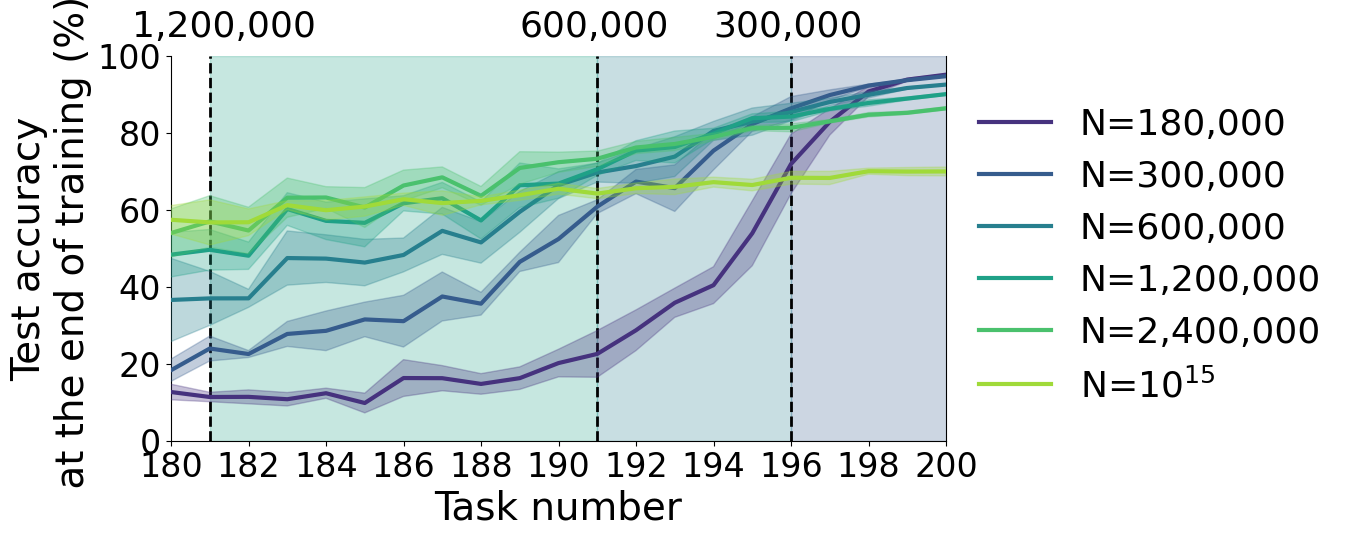

In [ ]:
colors = sns.color_palette("viridis", len(df["N"].unique()))
window = 20
fig, ax = plt.subplots(figsize=(10, 5))
for j, N in enumerate(df["N"].unique()):
    df_N = df[df["N"] == N ]
    # pick the row with 50 hidden units
    df_N_50 = df_N[df_N["layers"] == 50]
    for i, row in df_N_50.iterrows():
        accuracies = row["accuracies"]*100
        std = row["accuracy_std"]*100
        n_tasks = row["n_tasks"]
        task_range = jnp.arange(0, n_tasks)
        # add a "," every time there's three consecutive 0 for formatting
        text = "N=" + re.sub(r'(\d)(?=(\d{3})+(?!\d))', r'\1,', str(N)) if len(str(N)) < 10 else r"N=$10^{{{}}}$".format(len(str(N)) - 1) 
        sns.lineplot(
            x=task_range, 
            y=accuracies, 
            label=text, 
            color=colors[j], 
            ax=ax,  
            linewidth= 3,
            zorder = 10,
        )
        ax.fill_between(task_range, 
                        accuracies - std,
                        accuracies + std,
                        color=colors[j], 
                        alpha=0.3,
                        zorder = 10)
        print(f"Last five tasks accuracy for N={N}: {accuracies[-5:].mean():.2f} ± {std[-5:].mean():.2f}")
ax.set_xlabel("Task number", fontsize=AXESSIZE)
ax.set_ylabel("Test accuracy\n at the end of training (%)", fontsize=AXESSIZE)
ax.set_xlim(n_tasks-1-window, n_tasks-1)
ax.set_ylim(0, 100)
# tick labels from 190 to 199
ax.set_xticks(jnp.arange(n_tasks-1-window, n_tasks, window//10))
ax.set_xticklabels(jnp.arange(n_tasks-1-window, n_tasks, window//10)+1)
# yticks every 10
ax.set_yticks(jnp.arange(0, 101, 20))
# tick font size
ax.tick_params(axis='both', which='major', labelsize=TICKSIZE)
ax.spines['top'].set_visible(False)

alpha = 0.25
# vline at 195
ax.axvline(195, color="black", linestyle="--", linewidth=2)
# text next to line "mesu forgetting window"
ax.text(193, 105, "300,000", fontsize=FONTSIZE, rotation=0)
# rectangular grey background between 195 and 200
plt.axvspan(195, 200, color=colors[1], alpha=alpha, zorder=0)

# vline at 190
ax.axvline(190, color="black", linestyle="--", linewidth=2)
# text next to line "mesu forgetting window"
ax.text(188, 105, "600,000", fontsize=FONTSIZE, rotation=0)
# rectangular grey background between 195 and 200
plt.axvspan(190, 195, color=colors[2], alpha=alpha, zorder=0)

# vline at 180
ax.axvline(180, color="black", linestyle="--", linewidth=2)
# text next to line "mesu forgetting window"
ax.text(178, 105, "1,200,000", fontsize=FONTSIZE, rotation=0)
# rectangular grey background between 195 and 200
plt.axvspan(180, 190, color=colors[3], alpha=alpha, zorder=0)


ax.legend(loc="upper left", fontsize=LEGENDSIZE, frameon=False, bbox_to_anchor=(1, 0.95))
plt.show()
# savefig as pdf
fig.savefig(os.path.join(FOLDER, f"nstudy-last-{window}-acc-200.pdf"), bbox_inches="tight")
# svg
fig.savefig(os.path.join(FOLDER, f"nstudy-last-{window}-acc-200.svg"), bbox_inches="tight")
plt.close()
